In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
X, y = load_iris(return_X_y=True)
len(X),len(y),X,y

(150,
 150,
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1]

In [5]:
y = y.reshape(150,1)
data_base = np.hstack((X,y))

data_train,data_test = train_test_split(data_base,train_size=0.7,random_state=True)
len(data_train),len(data_test),data_train,data_test

(105,
 45,
 array([[7.7, 2.6, 6.9, 2.3, 2. ],
        [5.7, 3.8, 1.7, 0.3, 0. ],
        [5. , 3.6, 1.4, 0.2, 0. ],
        [4.8, 3. , 1.4, 0.3, 0. ],
        [5.2, 2.7, 3.9, 1.4, 1. ],
        [5.1, 3.4, 1.5, 0.2, 0. ],
        [5.5, 3.5, 1.3, 0.2, 0. ],
        [7.7, 3.8, 6.7, 2.2, 2. ],
        [6.9, 3.1, 5.4, 2.1, 2. ],
        [7.3, 2.9, 6.3, 1.8, 2. ],
        [6.4, 2.8, 5.6, 2.2, 2. ],
        [6.2, 2.8, 4.8, 1.8, 2. ],
        [6. , 3.4, 4.5, 1.6, 1. ],
        [7.7, 2.8, 6.7, 2. , 2. ],
        [5.7, 3. , 4.2, 1.2, 1. ],
        [4.8, 3.4, 1.6, 0.2, 0. ],
        [5.7, 2.5, 5. , 2. , 2. ],
        [6.3, 2.7, 4.9, 1.8, 2. ],
        [4.8, 3. , 1.4, 0.1, 0. ],
        [4.7, 3.2, 1.3, 0.2, 0. ],
        [6.5, 3. , 5.8, 2.2, 2. ],
        [4.6, 3.4, 1.4, 0.3, 0. ],
        [6.1, 3. , 4.9, 1.8, 2. ],
        [6.5, 3.2, 5.1, 2. , 2. ],
        [6.7, 3.1, 4.4, 1.4, 1. ],
        [5.7, 2.8, 4.5, 1.3, 1. ],
        [6.7, 3.3, 5.7, 2.5, 2. ],
        [6. , 3. , 4.8, 1.8, 2. ],
        [

Text(0.5, 0.98, '鸢尾花数据集\nBule->Setosa | Red->Versicolor | Green->Virginica')

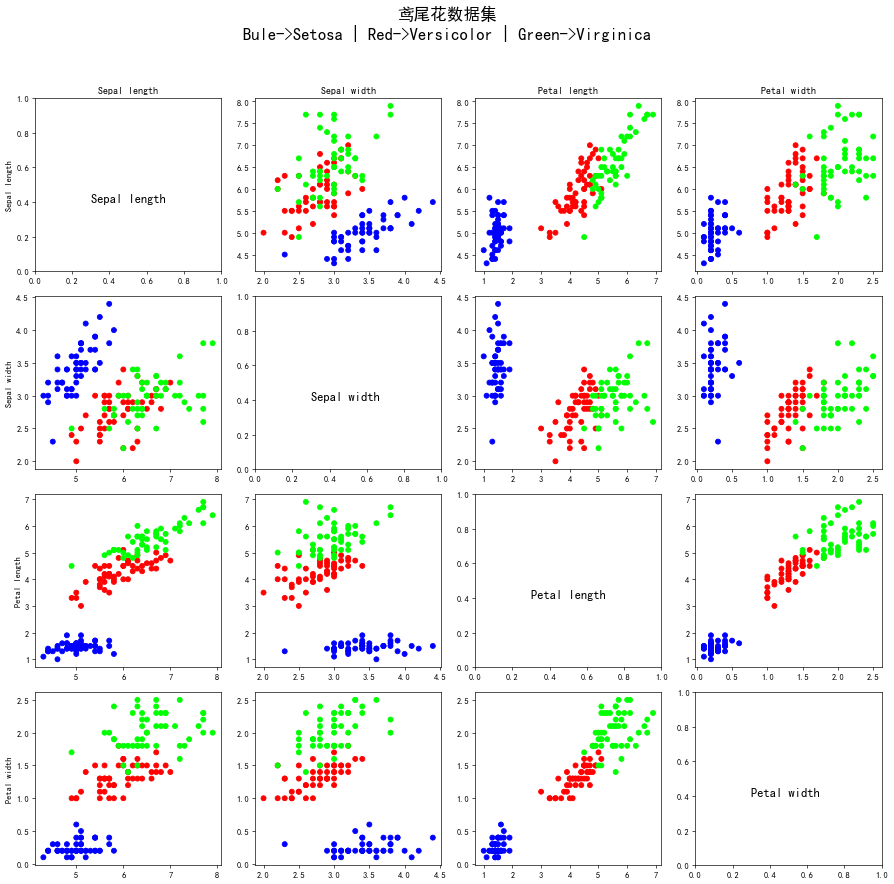

In [17]:
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
from pylab import *
font = FontProperties(fname=r"simsun.ttf",size=14)
plt.rcParams['font.sans-serif'] = ['SimHei']
names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Species']
iris_data = data_base
plt.figure(figsize=(15, 15), dpi=60)
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i * 4 + j + 1)
        if i == 0:
            plt.title(names[j])
        if j == 0:
            plt.ylabel(names[i])
        if i == j:
            plt.text(0.3, 0.4, names[i], fontsize=15)
            continue

        plt.scatter(iris_data[:, j], iris_data[:, i], c=iris_data[:, -1], cmap='brg')

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.suptitle('鸢尾花数据集\nBule->Setosa | Red->Versicolor | Green->Virginica', fontsize=20)

In [18]:
model_ada = AdaBoostClassifier(learning_rate=1,n_estimators=80)
model_ada.fit(data_train[:,:4],data_train[:,4])
model_ada.score(data_test[:,:4],data_test[:,4])

0.9777777777777777

In [21]:
criterions = ['gini','entropy']
n_estimators_array = np.arange(2,20,step = 1)
max_depth_array = np.arange(2,20,step = 1)
min_samples_split_array = np.arange(2,20,step = 1)
gini_score = []
entropy_score = []

def get_parameter_scores(criterion = 'gini'):
    gini_score = []
    for i in n_estimators_array:
        for j in max_depth_array:
            for k in min_samples_split_array:
                clf = RandomForestClassifier(n_estimators = i,criterion = criterion,max_depth = j,min_samples_split = k)
                clf.fit(data_train[:,:4],data_train[:,4])
                score = clf.score(data_test[:,:4],data_test[:,4])
                if criterion == 'gini':
                    gini_score.append([i,j,k,score])
                else:
                    entropy_score.append([i,j,k,score])
                print("now this parameter is working:n_estimators = {},max_depth = {},min_samples_split = {}".format(i,j,k))
    if criterion == 'gini':
        return gini_score
    else:
        return entropy_score
result1 = get_parameter_scores(criterion=criterions[0])
result2 = get_parameter_scores(criterion=criterions[1])

now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 2
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 3
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 4
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 5
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 6
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 7
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 8
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 9
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 10
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 11
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 12
now this parameter is working:n_estimators = 2,max_depth = 2,min_samples_split = 13


now this parameter is working:n_estimators = 2,max_depth = 12,min_samples_split = 13
now this parameter is working:n_estimators = 2,max_depth = 12,min_samples_split = 14
now this parameter is working:n_estimators = 2,max_depth = 12,min_samples_split = 15
now this parameter is working:n_estimators = 2,max_depth = 12,min_samples_split = 16
now this parameter is working:n_estimators = 2,max_depth = 12,min_samples_split = 17
now this parameter is working:n_estimators = 2,max_depth = 12,min_samples_split = 18
now this parameter is working:n_estimators = 2,max_depth = 12,min_samples_split = 19
now this parameter is working:n_estimators = 2,max_depth = 13,min_samples_split = 2
now this parameter is working:n_estimators = 2,max_depth = 13,min_samples_split = 3
now this parameter is working:n_estimators = 2,max_depth = 13,min_samples_split = 4
now this parameter is working:n_estimators = 2,max_depth = 13,min_samples_split = 5
now this parameter is working:n_estimators = 2,max_depth = 13,min_sam

now this parameter is working:n_estimators = 3,max_depth = 4,min_samples_split = 9
now this parameter is working:n_estimators = 3,max_depth = 4,min_samples_split = 10
now this parameter is working:n_estimators = 3,max_depth = 4,min_samples_split = 11
now this parameter is working:n_estimators = 3,max_depth = 4,min_samples_split = 12
now this parameter is working:n_estimators = 3,max_depth = 4,min_samples_split = 13
now this parameter is working:n_estimators = 3,max_depth = 4,min_samples_split = 14
now this parameter is working:n_estimators = 3,max_depth = 4,min_samples_split = 15
now this parameter is working:n_estimators = 3,max_depth = 4,min_samples_split = 16
now this parameter is working:n_estimators = 3,max_depth = 4,min_samples_split = 17
now this parameter is working:n_estimators = 3,max_depth = 4,min_samples_split = 18
now this parameter is working:n_estimators = 3,max_depth = 4,min_samples_split = 19
now this parameter is working:n_estimators = 3,max_depth = 5,min_samples_spli

now this parameter is working:n_estimators = 3,max_depth = 12,min_samples_split = 4
now this parameter is working:n_estimators = 3,max_depth = 12,min_samples_split = 5
now this parameter is working:n_estimators = 3,max_depth = 12,min_samples_split = 6
now this parameter is working:n_estimators = 3,max_depth = 12,min_samples_split = 7
now this parameter is working:n_estimators = 3,max_depth = 12,min_samples_split = 8
now this parameter is working:n_estimators = 3,max_depth = 12,min_samples_split = 9
now this parameter is working:n_estimators = 3,max_depth = 12,min_samples_split = 10
now this parameter is working:n_estimators = 3,max_depth = 12,min_samples_split = 11
now this parameter is working:n_estimators = 3,max_depth = 12,min_samples_split = 12
now this parameter is working:n_estimators = 3,max_depth = 12,min_samples_split = 13
now this parameter is working:n_estimators = 3,max_depth = 12,min_samples_split = 14
now this parameter is working:n_estimators = 3,max_depth = 12,min_sampl

now this parameter is working:n_estimators = 3,max_depth = 19,min_samples_split = 15
now this parameter is working:n_estimators = 3,max_depth = 19,min_samples_split = 16
now this parameter is working:n_estimators = 3,max_depth = 19,min_samples_split = 17
now this parameter is working:n_estimators = 3,max_depth = 19,min_samples_split = 18
now this parameter is working:n_estimators = 3,max_depth = 19,min_samples_split = 19
now this parameter is working:n_estimators = 4,max_depth = 2,min_samples_split = 2
now this parameter is working:n_estimators = 4,max_depth = 2,min_samples_split = 3
now this parameter is working:n_estimators = 4,max_depth = 2,min_samples_split = 4
now this parameter is working:n_estimators = 4,max_depth = 2,min_samples_split = 5
now this parameter is working:n_estimators = 4,max_depth = 2,min_samples_split = 6
now this parameter is working:n_estimators = 4,max_depth = 2,min_samples_split = 7
now this parameter is working:n_estimators = 4,max_depth = 2,min_samples_spli

now this parameter is working:n_estimators = 4,max_depth = 7,min_samples_split = 16
now this parameter is working:n_estimators = 4,max_depth = 7,min_samples_split = 17
now this parameter is working:n_estimators = 4,max_depth = 7,min_samples_split = 18
now this parameter is working:n_estimators = 4,max_depth = 7,min_samples_split = 19
now this parameter is working:n_estimators = 4,max_depth = 8,min_samples_split = 2
now this parameter is working:n_estimators = 4,max_depth = 8,min_samples_split = 3
now this parameter is working:n_estimators = 4,max_depth = 8,min_samples_split = 4
now this parameter is working:n_estimators = 4,max_depth = 8,min_samples_split = 5
now this parameter is working:n_estimators = 4,max_depth = 8,min_samples_split = 6
now this parameter is working:n_estimators = 4,max_depth = 8,min_samples_split = 7
now this parameter is working:n_estimators = 4,max_depth = 8,min_samples_split = 8
now this parameter is working:n_estimators = 4,max_depth = 8,min_samples_split = 9


now this parameter is working:n_estimators = 4,max_depth = 14,min_samples_split = 3
now this parameter is working:n_estimators = 4,max_depth = 14,min_samples_split = 4
now this parameter is working:n_estimators = 4,max_depth = 14,min_samples_split = 5
now this parameter is working:n_estimators = 4,max_depth = 14,min_samples_split = 6
now this parameter is working:n_estimators = 4,max_depth = 14,min_samples_split = 7
now this parameter is working:n_estimators = 4,max_depth = 14,min_samples_split = 8
now this parameter is working:n_estimators = 4,max_depth = 14,min_samples_split = 9
now this parameter is working:n_estimators = 4,max_depth = 14,min_samples_split = 10
now this parameter is working:n_estimators = 4,max_depth = 14,min_samples_split = 11
now this parameter is working:n_estimators = 4,max_depth = 14,min_samples_split = 12
now this parameter is working:n_estimators = 4,max_depth = 14,min_samples_split = 13
now this parameter is working:n_estimators = 4,max_depth = 14,min_sample

now this parameter is working:n_estimators = 5,max_depth = 2,min_samples_split = 5
now this parameter is working:n_estimators = 5,max_depth = 2,min_samples_split = 6
now this parameter is working:n_estimators = 5,max_depth = 2,min_samples_split = 7
now this parameter is working:n_estimators = 5,max_depth = 2,min_samples_split = 8
now this parameter is working:n_estimators = 5,max_depth = 2,min_samples_split = 9
now this parameter is working:n_estimators = 5,max_depth = 2,min_samples_split = 10
now this parameter is working:n_estimators = 5,max_depth = 2,min_samples_split = 11
now this parameter is working:n_estimators = 5,max_depth = 2,min_samples_split = 12
now this parameter is working:n_estimators = 5,max_depth = 2,min_samples_split = 13
now this parameter is working:n_estimators = 5,max_depth = 2,min_samples_split = 14
now this parameter is working:n_estimators = 5,max_depth = 2,min_samples_split = 15
now this parameter is working:n_estimators = 5,max_depth = 2,min_samples_split = 

now this parameter is working:n_estimators = 5,max_depth = 9,min_samples_split = 15
now this parameter is working:n_estimators = 5,max_depth = 9,min_samples_split = 16
now this parameter is working:n_estimators = 5,max_depth = 9,min_samples_split = 17
now this parameter is working:n_estimators = 5,max_depth = 9,min_samples_split = 18
now this parameter is working:n_estimators = 5,max_depth = 9,min_samples_split = 19
now this parameter is working:n_estimators = 5,max_depth = 10,min_samples_split = 2
now this parameter is working:n_estimators = 5,max_depth = 10,min_samples_split = 3
now this parameter is working:n_estimators = 5,max_depth = 10,min_samples_split = 4
now this parameter is working:n_estimators = 5,max_depth = 10,min_samples_split = 5
now this parameter is working:n_estimators = 5,max_depth = 10,min_samples_split = 6
now this parameter is working:n_estimators = 5,max_depth = 10,min_samples_split = 7
now this parameter is working:n_estimators = 5,max_depth = 10,min_samples_sp

now this parameter is working:n_estimators = 5,max_depth = 17,min_samples_split = 9
now this parameter is working:n_estimators = 5,max_depth = 17,min_samples_split = 10
now this parameter is working:n_estimators = 5,max_depth = 17,min_samples_split = 11
now this parameter is working:n_estimators = 5,max_depth = 17,min_samples_split = 12
now this parameter is working:n_estimators = 5,max_depth = 17,min_samples_split = 13
now this parameter is working:n_estimators = 5,max_depth = 17,min_samples_split = 14
now this parameter is working:n_estimators = 5,max_depth = 17,min_samples_split = 15
now this parameter is working:n_estimators = 5,max_depth = 17,min_samples_split = 16
now this parameter is working:n_estimators = 5,max_depth = 17,min_samples_split = 17
now this parameter is working:n_estimators = 5,max_depth = 17,min_samples_split = 18
now this parameter is working:n_estimators = 5,max_depth = 17,min_samples_split = 19
now this parameter is working:n_estimators = 5,max_depth = 18,min_

now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 4
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 5
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 6
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 7
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 8
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 9
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 10
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 11
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 12
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 13
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 14
now this parameter is working:n_estimators = 6,max_depth = 6,min_samples_split = 1

now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 11
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 12
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 13
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 14
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 15
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 16
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 17
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 18
now this parameter is working:n_estimators = 6,max_depth = 12,min_samples_split = 19
now this parameter is working:n_estimators = 6,max_depth = 13,min_samples_split = 2
now this parameter is working:n_estimators = 6,max_depth = 13,min_samples_split = 3
now this parameter is working:n_estimators = 6,max_depth = 13,min_s

now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 3
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 4
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 5
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 6
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 7
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 8
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 9
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 10
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 11
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 12
now this parameter is working:n_estimators = 6,max_depth = 19,min_samples_split = 13
now this parameter is working:n_estimators = 6,max_depth = 19,min_sample

now this parameter is working:n_estimators = 7,max_depth = 6,min_samples_split = 16
now this parameter is working:n_estimators = 7,max_depth = 6,min_samples_split = 17
now this parameter is working:n_estimators = 7,max_depth = 6,min_samples_split = 18
now this parameter is working:n_estimators = 7,max_depth = 6,min_samples_split = 19
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 2
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 3
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 4
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 5
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 6
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 7
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 8
now this parameter is working:n_estimators = 7,max_depth = 7,min_samples_split = 9


now this parameter is working:n_estimators = 7,max_depth = 12,min_samples_split = 10
now this parameter is working:n_estimators = 7,max_depth = 12,min_samples_split = 11
now this parameter is working:n_estimators = 7,max_depth = 12,min_samples_split = 12
now this parameter is working:n_estimators = 7,max_depth = 12,min_samples_split = 13
now this parameter is working:n_estimators = 7,max_depth = 12,min_samples_split = 14
now this parameter is working:n_estimators = 7,max_depth = 12,min_samples_split = 15
now this parameter is working:n_estimators = 7,max_depth = 12,min_samples_split = 16
now this parameter is working:n_estimators = 7,max_depth = 12,min_samples_split = 17
now this parameter is working:n_estimators = 7,max_depth = 12,min_samples_split = 18
now this parameter is working:n_estimators = 7,max_depth = 12,min_samples_split = 19
now this parameter is working:n_estimators = 7,max_depth = 13,min_samples_split = 2
now this parameter is working:n_estimators = 7,max_depth = 13,min_

now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 5
now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 6
now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 7
now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 8
now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 9
now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 10
now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 11
now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 12
now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 13
now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 14
now this parameter is working:n_estimators = 7,max_depth = 18,min_samples_split = 15
now this parameter is working:n_estimators = 7,max_depth = 18,min_samp

now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 4
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 5
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 6
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 7
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 8
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 9
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 10
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 11
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 12
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 13
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 14
now this parameter is working:n_estimators = 8,max_depth = 7,min_samples_split = 1

now this parameter is working:n_estimators = 8,max_depth = 13,min_samples_split = 18
now this parameter is working:n_estimators = 8,max_depth = 13,min_samples_split = 19
now this parameter is working:n_estimators = 8,max_depth = 14,min_samples_split = 2
now this parameter is working:n_estimators = 8,max_depth = 14,min_samples_split = 3
now this parameter is working:n_estimators = 8,max_depth = 14,min_samples_split = 4
now this parameter is working:n_estimators = 8,max_depth = 14,min_samples_split = 5
now this parameter is working:n_estimators = 8,max_depth = 14,min_samples_split = 6
now this parameter is working:n_estimators = 8,max_depth = 14,min_samples_split = 7
now this parameter is working:n_estimators = 8,max_depth = 14,min_samples_split = 8
now this parameter is working:n_estimators = 8,max_depth = 14,min_samples_split = 9
now this parameter is working:n_estimators = 8,max_depth = 14,min_samples_split = 10
now this parameter is working:n_estimators = 8,max_depth = 14,min_samples

now this parameter is working:n_estimators = 9,max_depth = 2,min_samples_split = 13
now this parameter is working:n_estimators = 9,max_depth = 2,min_samples_split = 14
now this parameter is working:n_estimators = 9,max_depth = 2,min_samples_split = 15
now this parameter is working:n_estimators = 9,max_depth = 2,min_samples_split = 16
now this parameter is working:n_estimators = 9,max_depth = 2,min_samples_split = 17
now this parameter is working:n_estimators = 9,max_depth = 2,min_samples_split = 18
now this parameter is working:n_estimators = 9,max_depth = 2,min_samples_split = 19
now this parameter is working:n_estimators = 9,max_depth = 3,min_samples_split = 2
now this parameter is working:n_estimators = 9,max_depth = 3,min_samples_split = 3
now this parameter is working:n_estimators = 9,max_depth = 3,min_samples_split = 4
now this parameter is working:n_estimators = 9,max_depth = 3,min_samples_split = 5
now this parameter is working:n_estimators = 9,max_depth = 3,min_samples_split =

now this parameter is working:n_estimators = 9,max_depth = 8,min_samples_split = 19
now this parameter is working:n_estimators = 9,max_depth = 9,min_samples_split = 2
now this parameter is working:n_estimators = 9,max_depth = 9,min_samples_split = 3
now this parameter is working:n_estimators = 9,max_depth = 9,min_samples_split = 4
now this parameter is working:n_estimators = 9,max_depth = 9,min_samples_split = 5
now this parameter is working:n_estimators = 9,max_depth = 9,min_samples_split = 6
now this parameter is working:n_estimators = 9,max_depth = 9,min_samples_split = 7
now this parameter is working:n_estimators = 9,max_depth = 9,min_samples_split = 8
now this parameter is working:n_estimators = 9,max_depth = 9,min_samples_split = 9
now this parameter is working:n_estimators = 9,max_depth = 9,min_samples_split = 10
now this parameter is working:n_estimators = 9,max_depth = 9,min_samples_split = 11
now this parameter is working:n_estimators = 9,max_depth = 9,min_samples_split = 12


now this parameter is working:n_estimators = 9,max_depth = 15,min_samples_split = 6
now this parameter is working:n_estimators = 9,max_depth = 15,min_samples_split = 7
now this parameter is working:n_estimators = 9,max_depth = 15,min_samples_split = 8
now this parameter is working:n_estimators = 9,max_depth = 15,min_samples_split = 9
now this parameter is working:n_estimators = 9,max_depth = 15,min_samples_split = 10
now this parameter is working:n_estimators = 9,max_depth = 15,min_samples_split = 11
now this parameter is working:n_estimators = 9,max_depth = 15,min_samples_split = 12
now this parameter is working:n_estimators = 9,max_depth = 15,min_samples_split = 13
now this parameter is working:n_estimators = 9,max_depth = 15,min_samples_split = 14
now this parameter is working:n_estimators = 9,max_depth = 15,min_samples_split = 15
now this parameter is working:n_estimators = 9,max_depth = 15,min_samples_split = 16
now this parameter is working:n_estimators = 9,max_depth = 15,min_sam

now this parameter is working:n_estimators = 10,max_depth = 3,min_samples_split = 6
now this parameter is working:n_estimators = 10,max_depth = 3,min_samples_split = 7
now this parameter is working:n_estimators = 10,max_depth = 3,min_samples_split = 8
now this parameter is working:n_estimators = 10,max_depth = 3,min_samples_split = 9
now this parameter is working:n_estimators = 10,max_depth = 3,min_samples_split = 10
now this parameter is working:n_estimators = 10,max_depth = 3,min_samples_split = 11
now this parameter is working:n_estimators = 10,max_depth = 3,min_samples_split = 12
now this parameter is working:n_estimators = 10,max_depth = 3,min_samples_split = 13
now this parameter is working:n_estimators = 10,max_depth = 3,min_samples_split = 14
now this parameter is working:n_estimators = 10,max_depth = 3,min_samples_split = 15
now this parameter is working:n_estimators = 10,max_depth = 3,min_samples_split = 16
now this parameter is working:n_estimators = 10,max_depth = 3,min_sam

now this parameter is working:n_estimators = 10,max_depth = 9,min_samples_split = 3
now this parameter is working:n_estimators = 10,max_depth = 9,min_samples_split = 4
now this parameter is working:n_estimators = 10,max_depth = 9,min_samples_split = 5
now this parameter is working:n_estimators = 10,max_depth = 9,min_samples_split = 6
now this parameter is working:n_estimators = 10,max_depth = 9,min_samples_split = 7
now this parameter is working:n_estimators = 10,max_depth = 9,min_samples_split = 8
now this parameter is working:n_estimators = 10,max_depth = 9,min_samples_split = 9
now this parameter is working:n_estimators = 10,max_depth = 9,min_samples_split = 10
now this parameter is working:n_estimators = 10,max_depth = 9,min_samples_split = 11
now this parameter is working:n_estimators = 10,max_depth = 9,min_samples_split = 12
now this parameter is working:n_estimators = 10,max_depth = 9,min_samples_split = 13
now this parameter is working:n_estimators = 10,max_depth = 9,min_sample

now this parameter is working:n_estimators = 10,max_depth = 14,min_samples_split = 14
now this parameter is working:n_estimators = 10,max_depth = 14,min_samples_split = 15
now this parameter is working:n_estimators = 10,max_depth = 14,min_samples_split = 16
now this parameter is working:n_estimators = 10,max_depth = 14,min_samples_split = 17
now this parameter is working:n_estimators = 10,max_depth = 14,min_samples_split = 18
now this parameter is working:n_estimators = 10,max_depth = 14,min_samples_split = 19
now this parameter is working:n_estimators = 10,max_depth = 15,min_samples_split = 2
now this parameter is working:n_estimators = 10,max_depth = 15,min_samples_split = 3
now this parameter is working:n_estimators = 10,max_depth = 15,min_samples_split = 4
now this parameter is working:n_estimators = 10,max_depth = 15,min_samples_split = 5
now this parameter is working:n_estimators = 10,max_depth = 15,min_samples_split = 6
now this parameter is working:n_estimators = 10,max_depth =

now this parameter is working:n_estimators = 11,max_depth = 2,min_samples_split = 5
now this parameter is working:n_estimators = 11,max_depth = 2,min_samples_split = 6
now this parameter is working:n_estimators = 11,max_depth = 2,min_samples_split = 7
now this parameter is working:n_estimators = 11,max_depth = 2,min_samples_split = 8
now this parameter is working:n_estimators = 11,max_depth = 2,min_samples_split = 9
now this parameter is working:n_estimators = 11,max_depth = 2,min_samples_split = 10
now this parameter is working:n_estimators = 11,max_depth = 2,min_samples_split = 11
now this parameter is working:n_estimators = 11,max_depth = 2,min_samples_split = 12
now this parameter is working:n_estimators = 11,max_depth = 2,min_samples_split = 13
now this parameter is working:n_estimators = 11,max_depth = 2,min_samples_split = 14
now this parameter is working:n_estimators = 11,max_depth = 2,min_samples_split = 15
now this parameter is working:n_estimators = 11,max_depth = 2,min_samp

now this parameter is working:n_estimators = 11,max_depth = 8,min_samples_split = 17
now this parameter is working:n_estimators = 11,max_depth = 8,min_samples_split = 18
now this parameter is working:n_estimators = 11,max_depth = 8,min_samples_split = 19
now this parameter is working:n_estimators = 11,max_depth = 9,min_samples_split = 2
now this parameter is working:n_estimators = 11,max_depth = 9,min_samples_split = 3
now this parameter is working:n_estimators = 11,max_depth = 9,min_samples_split = 4
now this parameter is working:n_estimators = 11,max_depth = 9,min_samples_split = 5
now this parameter is working:n_estimators = 11,max_depth = 9,min_samples_split = 6
now this parameter is working:n_estimators = 11,max_depth = 9,min_samples_split = 7
now this parameter is working:n_estimators = 11,max_depth = 9,min_samples_split = 8
now this parameter is working:n_estimators = 11,max_depth = 9,min_samples_split = 9
now this parameter is working:n_estimators = 11,max_depth = 9,min_samples

now this parameter is working:n_estimators = 11,max_depth = 15,min_samples_split = 10
now this parameter is working:n_estimators = 11,max_depth = 15,min_samples_split = 11
now this parameter is working:n_estimators = 11,max_depth = 15,min_samples_split = 12
now this parameter is working:n_estimators = 11,max_depth = 15,min_samples_split = 13
now this parameter is working:n_estimators = 11,max_depth = 15,min_samples_split = 14
now this parameter is working:n_estimators = 11,max_depth = 15,min_samples_split = 15
now this parameter is working:n_estimators = 11,max_depth = 15,min_samples_split = 16
now this parameter is working:n_estimators = 11,max_depth = 15,min_samples_split = 17
now this parameter is working:n_estimators = 11,max_depth = 15,min_samples_split = 18
now this parameter is working:n_estimators = 11,max_depth = 15,min_samples_split = 19
now this parameter is working:n_estimators = 11,max_depth = 16,min_samples_split = 2
now this parameter is working:n_estimators = 11,max_dep

now this parameter is working:n_estimators = 12,max_depth = 3,min_samples_split = 18
now this parameter is working:n_estimators = 12,max_depth = 3,min_samples_split = 19
now this parameter is working:n_estimators = 12,max_depth = 4,min_samples_split = 2
now this parameter is working:n_estimators = 12,max_depth = 4,min_samples_split = 3
now this parameter is working:n_estimators = 12,max_depth = 4,min_samples_split = 4
now this parameter is working:n_estimators = 12,max_depth = 4,min_samples_split = 5
now this parameter is working:n_estimators = 12,max_depth = 4,min_samples_split = 6
now this parameter is working:n_estimators = 12,max_depth = 4,min_samples_split = 7
now this parameter is working:n_estimators = 12,max_depth = 4,min_samples_split = 8
now this parameter is working:n_estimators = 12,max_depth = 4,min_samples_split = 9
now this parameter is working:n_estimators = 12,max_depth = 4,min_samples_split = 10
now this parameter is working:n_estimators = 12,max_depth = 4,min_samples

now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 4
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 5
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 6
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 7
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 8
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 9
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 10
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 11
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 12
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 13
now this parameter is working:n_estimators = 12,max_depth = 10,min_samples_split = 14
now this parameter is working:n_estimators = 12,max_depth = 

now this parameter is working:n_estimators = 12,max_depth = 16,min_samples_split = 4
now this parameter is working:n_estimators = 12,max_depth = 16,min_samples_split = 5
now this parameter is working:n_estimators = 12,max_depth = 16,min_samples_split = 6
now this parameter is working:n_estimators = 12,max_depth = 16,min_samples_split = 7
now this parameter is working:n_estimators = 12,max_depth = 16,min_samples_split = 8
now this parameter is working:n_estimators = 12,max_depth = 16,min_samples_split = 9
now this parameter is working:n_estimators = 12,max_depth = 16,min_samples_split = 10
now this parameter is working:n_estimators = 12,max_depth = 16,min_samples_split = 11
now this parameter is working:n_estimators = 12,max_depth = 16,min_samples_split = 12
now this parameter is working:n_estimators = 12,max_depth = 16,min_samples_split = 13
now this parameter is working:n_estimators = 12,max_depth = 16,min_samples_split = 14
now this parameter is working:n_estimators = 12,max_depth = 

now this parameter is working:n_estimators = 13,max_depth = 4,min_samples_split = 2
now this parameter is working:n_estimators = 13,max_depth = 4,min_samples_split = 3
now this parameter is working:n_estimators = 13,max_depth = 4,min_samples_split = 4
now this parameter is working:n_estimators = 13,max_depth = 4,min_samples_split = 5
now this parameter is working:n_estimators = 13,max_depth = 4,min_samples_split = 6
now this parameter is working:n_estimators = 13,max_depth = 4,min_samples_split = 7
now this parameter is working:n_estimators = 13,max_depth = 4,min_samples_split = 8
now this parameter is working:n_estimators = 13,max_depth = 4,min_samples_split = 9
now this parameter is working:n_estimators = 13,max_depth = 4,min_samples_split = 10
now this parameter is working:n_estimators = 13,max_depth = 4,min_samples_split = 11
now this parameter is working:n_estimators = 13,max_depth = 4,min_samples_split = 12
now this parameter is working:n_estimators = 13,max_depth = 4,min_samples

now this parameter is working:n_estimators = 13,max_depth = 9,min_samples_split = 13
now this parameter is working:n_estimators = 13,max_depth = 9,min_samples_split = 14
now this parameter is working:n_estimators = 13,max_depth = 9,min_samples_split = 15
now this parameter is working:n_estimators = 13,max_depth = 9,min_samples_split = 16
now this parameter is working:n_estimators = 13,max_depth = 9,min_samples_split = 17
now this parameter is working:n_estimators = 13,max_depth = 9,min_samples_split = 18
now this parameter is working:n_estimators = 13,max_depth = 9,min_samples_split = 19
now this parameter is working:n_estimators = 13,max_depth = 10,min_samples_split = 2
now this parameter is working:n_estimators = 13,max_depth = 10,min_samples_split = 3
now this parameter is working:n_estimators = 13,max_depth = 10,min_samples_split = 4
now this parameter is working:n_estimators = 13,max_depth = 10,min_samples_split = 5
now this parameter is working:n_estimators = 13,max_depth = 10,mi

now this parameter is working:n_estimators = 13,max_depth = 15,min_samples_split = 7
now this parameter is working:n_estimators = 13,max_depth = 15,min_samples_split = 8
now this parameter is working:n_estimators = 13,max_depth = 15,min_samples_split = 9
now this parameter is working:n_estimators = 13,max_depth = 15,min_samples_split = 10
now this parameter is working:n_estimators = 13,max_depth = 15,min_samples_split = 11
now this parameter is working:n_estimators = 13,max_depth = 15,min_samples_split = 12
now this parameter is working:n_estimators = 13,max_depth = 15,min_samples_split = 13
now this parameter is working:n_estimators = 13,max_depth = 15,min_samples_split = 14
now this parameter is working:n_estimators = 13,max_depth = 15,min_samples_split = 15
now this parameter is working:n_estimators = 13,max_depth = 15,min_samples_split = 16
now this parameter is working:n_estimators = 13,max_depth = 15,min_samples_split = 17
now this parameter is working:n_estimators = 13,max_depth

now this parameter is working:n_estimators = 14,max_depth = 2,min_samples_split = 19
now this parameter is working:n_estimators = 14,max_depth = 3,min_samples_split = 2
now this parameter is working:n_estimators = 14,max_depth = 3,min_samples_split = 3
now this parameter is working:n_estimators = 14,max_depth = 3,min_samples_split = 4
now this parameter is working:n_estimators = 14,max_depth = 3,min_samples_split = 5
now this parameter is working:n_estimators = 14,max_depth = 3,min_samples_split = 6
now this parameter is working:n_estimators = 14,max_depth = 3,min_samples_split = 7
now this parameter is working:n_estimators = 14,max_depth = 3,min_samples_split = 8
now this parameter is working:n_estimators = 14,max_depth = 3,min_samples_split = 9
now this parameter is working:n_estimators = 14,max_depth = 3,min_samples_split = 10
now this parameter is working:n_estimators = 14,max_depth = 3,min_samples_split = 11
now this parameter is working:n_estimators = 14,max_depth = 3,min_samples

now this parameter is working:n_estimators = 14,max_depth = 9,min_samples_split = 6
now this parameter is working:n_estimators = 14,max_depth = 9,min_samples_split = 7
now this parameter is working:n_estimators = 14,max_depth = 9,min_samples_split = 8
now this parameter is working:n_estimators = 14,max_depth = 9,min_samples_split = 9
now this parameter is working:n_estimators = 14,max_depth = 9,min_samples_split = 10
now this parameter is working:n_estimators = 14,max_depth = 9,min_samples_split = 11
now this parameter is working:n_estimators = 14,max_depth = 9,min_samples_split = 12
now this parameter is working:n_estimators = 14,max_depth = 9,min_samples_split = 13
now this parameter is working:n_estimators = 14,max_depth = 9,min_samples_split = 14
now this parameter is working:n_estimators = 14,max_depth = 9,min_samples_split = 15
now this parameter is working:n_estimators = 14,max_depth = 9,min_samples_split = 16
now this parameter is working:n_estimators = 14,max_depth = 9,min_sam

now this parameter is working:n_estimators = 14,max_depth = 14,min_samples_split = 13
now this parameter is working:n_estimators = 14,max_depth = 14,min_samples_split = 14
now this parameter is working:n_estimators = 14,max_depth = 14,min_samples_split = 15
now this parameter is working:n_estimators = 14,max_depth = 14,min_samples_split = 16
now this parameter is working:n_estimators = 14,max_depth = 14,min_samples_split = 17
now this parameter is working:n_estimators = 14,max_depth = 14,min_samples_split = 18
now this parameter is working:n_estimators = 14,max_depth = 14,min_samples_split = 19
now this parameter is working:n_estimators = 14,max_depth = 15,min_samples_split = 2
now this parameter is working:n_estimators = 14,max_depth = 15,min_samples_split = 3
now this parameter is working:n_estimators = 14,max_depth = 15,min_samples_split = 4
now this parameter is working:n_estimators = 14,max_depth = 15,min_samples_split = 5
now this parameter is working:n_estimators = 14,max_depth 

now this parameter is working:n_estimators = 15,max_depth = 2,min_samples_split = 17
now this parameter is working:n_estimators = 15,max_depth = 2,min_samples_split = 18
now this parameter is working:n_estimators = 15,max_depth = 2,min_samples_split = 19
now this parameter is working:n_estimators = 15,max_depth = 3,min_samples_split = 2
now this parameter is working:n_estimators = 15,max_depth = 3,min_samples_split = 3
now this parameter is working:n_estimators = 15,max_depth = 3,min_samples_split = 4
now this parameter is working:n_estimators = 15,max_depth = 3,min_samples_split = 5
now this parameter is working:n_estimators = 15,max_depth = 3,min_samples_split = 6
now this parameter is working:n_estimators = 15,max_depth = 3,min_samples_split = 7
now this parameter is working:n_estimators = 15,max_depth = 3,min_samples_split = 8
now this parameter is working:n_estimators = 15,max_depth = 3,min_samples_split = 9
now this parameter is working:n_estimators = 15,max_depth = 3,min_samples

now this parameter is working:n_estimators = 15,max_depth = 8,min_samples_split = 15
now this parameter is working:n_estimators = 15,max_depth = 8,min_samples_split = 16
now this parameter is working:n_estimators = 15,max_depth = 8,min_samples_split = 17
now this parameter is working:n_estimators = 15,max_depth = 8,min_samples_split = 18
now this parameter is working:n_estimators = 15,max_depth = 8,min_samples_split = 19
now this parameter is working:n_estimators = 15,max_depth = 9,min_samples_split = 2
now this parameter is working:n_estimators = 15,max_depth = 9,min_samples_split = 3
now this parameter is working:n_estimators = 15,max_depth = 9,min_samples_split = 4
now this parameter is working:n_estimators = 15,max_depth = 9,min_samples_split = 5
now this parameter is working:n_estimators = 15,max_depth = 9,min_samples_split = 6
now this parameter is working:n_estimators = 15,max_depth = 9,min_samples_split = 7
now this parameter is working:n_estimators = 15,max_depth = 9,min_sampl

now this parameter is working:n_estimators = 15,max_depth = 14,min_samples_split = 15
now this parameter is working:n_estimators = 15,max_depth = 14,min_samples_split = 16
now this parameter is working:n_estimators = 15,max_depth = 14,min_samples_split = 17
now this parameter is working:n_estimators = 15,max_depth = 14,min_samples_split = 18
now this parameter is working:n_estimators = 15,max_depth = 14,min_samples_split = 19
now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 2
now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 3
now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 4
now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 5
now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 6
now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 7
now this parameter is working:n_estimators = 15,max_depth = 

now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 14
now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 15
now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 16
now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 17
now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 18
now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 19
now this parameter is working:n_estimators = 16,max_depth = 3,min_samples_split = 2
now this parameter is working:n_estimators = 16,max_depth = 3,min_samples_split = 3
now this parameter is working:n_estimators = 16,max_depth = 3,min_samples_split = 4
now this parameter is working:n_estimators = 16,max_depth = 3,min_samples_split = 5
now this parameter is working:n_estimators = 16,max_depth = 3,min_samples_split = 6
now this parameter is working:n_estimators = 16,max_depth = 3,min_samp

now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 8
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 9
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 10
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 11
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 12
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 13
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 14
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 15
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 16
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 17
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 18
now this parameter is working:n_estimators = 16,max_depth = 8,min_s

now this parameter is working:n_estimators = 16,max_depth = 13,min_samples_split = 19
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 2
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 3
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 4
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 5
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 6
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 7
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 8
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 9
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 10
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 11
now this parameter is working:n_estimators = 16,max_depth = 14

now this parameter is working:n_estimators = 16,max_depth = 19,min_samples_split = 14
now this parameter is working:n_estimators = 16,max_depth = 19,min_samples_split = 15
now this parameter is working:n_estimators = 16,max_depth = 19,min_samples_split = 16
now this parameter is working:n_estimators = 16,max_depth = 19,min_samples_split = 17
now this parameter is working:n_estimators = 16,max_depth = 19,min_samples_split = 18
now this parameter is working:n_estimators = 16,max_depth = 19,min_samples_split = 19
now this parameter is working:n_estimators = 17,max_depth = 2,min_samples_split = 2
now this parameter is working:n_estimators = 17,max_depth = 2,min_samples_split = 3
now this parameter is working:n_estimators = 17,max_depth = 2,min_samples_split = 4
now this parameter is working:n_estimators = 17,max_depth = 2,min_samples_split = 5
now this parameter is working:n_estimators = 17,max_depth = 2,min_samples_split = 6
now this parameter is working:n_estimators = 17,max_depth = 2,mi

now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 3
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 4
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 5
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 6
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 7
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 8
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 9
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 10
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 11
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 12
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 13
now this parameter is working:n_estimators = 17,max_depth = 7,min_sample

now this parameter is working:n_estimators = 17,max_depth = 12,min_samples_split = 10
now this parameter is working:n_estimators = 17,max_depth = 12,min_samples_split = 11
now this parameter is working:n_estimators = 17,max_depth = 12,min_samples_split = 12
now this parameter is working:n_estimators = 17,max_depth = 12,min_samples_split = 13
now this parameter is working:n_estimators = 17,max_depth = 12,min_samples_split = 14
now this parameter is working:n_estimators = 17,max_depth = 12,min_samples_split = 15
now this parameter is working:n_estimators = 17,max_depth = 12,min_samples_split = 16
now this parameter is working:n_estimators = 17,max_depth = 12,min_samples_split = 17
now this parameter is working:n_estimators = 17,max_depth = 12,min_samples_split = 18
now this parameter is working:n_estimators = 17,max_depth = 12,min_samples_split = 19
now this parameter is working:n_estimators = 17,max_depth = 13,min_samples_split = 2
now this parameter is working:n_estimators = 17,max_dep

now this parameter is working:n_estimators = 17,max_depth = 17,min_samples_split = 17
now this parameter is working:n_estimators = 17,max_depth = 17,min_samples_split = 18
now this parameter is working:n_estimators = 17,max_depth = 17,min_samples_split = 19
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 2
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 3
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 4
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 5
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 6
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 7
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 8
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 9
now this parameter is working:n_estimators = 17,max_depth = 18

now this parameter is working:n_estimators = 18,max_depth = 5,min_samples_split = 17
now this parameter is working:n_estimators = 18,max_depth = 5,min_samples_split = 18
now this parameter is working:n_estimators = 18,max_depth = 5,min_samples_split = 19
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 2
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 3
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 4
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 5
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 6
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 7
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 8
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 9
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples

now this parameter is working:n_estimators = 18,max_depth = 11,min_samples_split = 15
now this parameter is working:n_estimators = 18,max_depth = 11,min_samples_split = 16
now this parameter is working:n_estimators = 18,max_depth = 11,min_samples_split = 17
now this parameter is working:n_estimators = 18,max_depth = 11,min_samples_split = 18
now this parameter is working:n_estimators = 18,max_depth = 11,min_samples_split = 19
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 2
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 3
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 4
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 5
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 6
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 7
now this parameter is working:n_estimators = 18,max_depth = 

now this parameter is working:n_estimators = 18,max_depth = 17,min_samples_split = 15
now this parameter is working:n_estimators = 18,max_depth = 17,min_samples_split = 16
now this parameter is working:n_estimators = 18,max_depth = 17,min_samples_split = 17
now this parameter is working:n_estimators = 18,max_depth = 17,min_samples_split = 18
now this parameter is working:n_estimators = 18,max_depth = 17,min_samples_split = 19
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 2
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 3
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 4
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 5
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 6
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 7
now this parameter is working:n_estimators = 18,max_depth = 

now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 10
now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 11
now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 12
now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 13
now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 14
now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 15
now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 16
now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 17
now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 18
now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 19
now this parameter is working:n_estimators = 19,max_depth = 6,min_samples_split = 2
now this parameter is working:n_estimators = 19,max_depth = 6,min_

now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 5
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 6
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 7
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 8
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 9
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 10
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 11
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 12
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 13
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 14
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 15
now this parameter is working:n_estimators = 19,max_depth =

now this parameter is working:n_estimators = 19,max_depth = 16,min_samples_split = 18
now this parameter is working:n_estimators = 19,max_depth = 16,min_samples_split = 19
now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 2
now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 3
now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 4
now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 5
now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 6
now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 7
now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 8
now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 9
now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 10
now this parameter is working:n_estimators = 19,max_depth = 17

now this parameter is working:n_estimators = 2,max_depth = 7,min_samples_split = 15
now this parameter is working:n_estimators = 2,max_depth = 7,min_samples_split = 16
now this parameter is working:n_estimators = 2,max_depth = 7,min_samples_split = 17
now this parameter is working:n_estimators = 2,max_depth = 7,min_samples_split = 18
now this parameter is working:n_estimators = 2,max_depth = 7,min_samples_split = 19
now this parameter is working:n_estimators = 2,max_depth = 8,min_samples_split = 2
now this parameter is working:n_estimators = 2,max_depth = 8,min_samples_split = 3
now this parameter is working:n_estimators = 2,max_depth = 8,min_samples_split = 4
now this parameter is working:n_estimators = 2,max_depth = 8,min_samples_split = 5
now this parameter is working:n_estimators = 2,max_depth = 8,min_samples_split = 6
now this parameter is working:n_estimators = 2,max_depth = 8,min_samples_split = 7
now this parameter is working:n_estimators = 2,max_depth = 8,min_samples_split = 8

now this parameter is working:n_estimators = 2,max_depth = 18,min_samples_split = 12
now this parameter is working:n_estimators = 2,max_depth = 18,min_samples_split = 13
now this parameter is working:n_estimators = 2,max_depth = 18,min_samples_split = 14
now this parameter is working:n_estimators = 2,max_depth = 18,min_samples_split = 15
now this parameter is working:n_estimators = 2,max_depth = 18,min_samples_split = 16
now this parameter is working:n_estimators = 2,max_depth = 18,min_samples_split = 17
now this parameter is working:n_estimators = 2,max_depth = 18,min_samples_split = 18
now this parameter is working:n_estimators = 2,max_depth = 18,min_samples_split = 19
now this parameter is working:n_estimators = 2,max_depth = 19,min_samples_split = 2
now this parameter is working:n_estimators = 2,max_depth = 19,min_samples_split = 3
now this parameter is working:n_estimators = 2,max_depth = 19,min_samples_split = 4
now this parameter is working:n_estimators = 2,max_depth = 19,min_sa

now this parameter is working:n_estimators = 3,max_depth = 8,min_samples_split = 9
now this parameter is working:n_estimators = 3,max_depth = 8,min_samples_split = 10
now this parameter is working:n_estimators = 3,max_depth = 8,min_samples_split = 11
now this parameter is working:n_estimators = 3,max_depth = 8,min_samples_split = 12
now this parameter is working:n_estimators = 3,max_depth = 8,min_samples_split = 13
now this parameter is working:n_estimators = 3,max_depth = 8,min_samples_split = 14
now this parameter is working:n_estimators = 3,max_depth = 8,min_samples_split = 15
now this parameter is working:n_estimators = 3,max_depth = 8,min_samples_split = 16
now this parameter is working:n_estimators = 3,max_depth = 8,min_samples_split = 17
now this parameter is working:n_estimators = 3,max_depth = 8,min_samples_split = 18
now this parameter is working:n_estimators = 3,max_depth = 8,min_samples_split = 19
now this parameter is working:n_estimators = 3,max_depth = 9,min_samples_spli

now this parameter is working:n_estimators = 3,max_depth = 16,min_samples_split = 7
now this parameter is working:n_estimators = 3,max_depth = 16,min_samples_split = 8
now this parameter is working:n_estimators = 3,max_depth = 16,min_samples_split = 9
now this parameter is working:n_estimators = 3,max_depth = 16,min_samples_split = 10
now this parameter is working:n_estimators = 3,max_depth = 16,min_samples_split = 11
now this parameter is working:n_estimators = 3,max_depth = 16,min_samples_split = 12
now this parameter is working:n_estimators = 3,max_depth = 16,min_samples_split = 13
now this parameter is working:n_estimators = 3,max_depth = 16,min_samples_split = 14
now this parameter is working:n_estimators = 3,max_depth = 16,min_samples_split = 15
now this parameter is working:n_estimators = 3,max_depth = 16,min_samples_split = 16
now this parameter is working:n_estimators = 3,max_depth = 16,min_samples_split = 17
now this parameter is working:n_estimators = 3,max_depth = 16,min_sa

now this parameter is working:n_estimators = 4,max_depth = 5,min_samples_split = 9
now this parameter is working:n_estimators = 4,max_depth = 5,min_samples_split = 10
now this parameter is working:n_estimators = 4,max_depth = 5,min_samples_split = 11
now this parameter is working:n_estimators = 4,max_depth = 5,min_samples_split = 12
now this parameter is working:n_estimators = 4,max_depth = 5,min_samples_split = 13
now this parameter is working:n_estimators = 4,max_depth = 5,min_samples_split = 14
now this parameter is working:n_estimators = 4,max_depth = 5,min_samples_split = 15
now this parameter is working:n_estimators = 4,max_depth = 5,min_samples_split = 16
now this parameter is working:n_estimators = 4,max_depth = 5,min_samples_split = 17
now this parameter is working:n_estimators = 4,max_depth = 5,min_samples_split = 18
now this parameter is working:n_estimators = 4,max_depth = 5,min_samples_split = 19
now this parameter is working:n_estimators = 4,max_depth = 6,min_samples_spli

now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 8
now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 9
now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 10
now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 11
now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 12
now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 13
now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 14
now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 15
now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 16
now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 17
now this parameter is working:n_estimators = 4,max_depth = 11,min_samples_split = 18
now this parameter is working:n_estimators = 4,max_depth = 11,min_s

now this parameter is working:n_estimators = 4,max_depth = 17,min_samples_split = 11
now this parameter is working:n_estimators = 4,max_depth = 17,min_samples_split = 12
now this parameter is working:n_estimators = 4,max_depth = 17,min_samples_split = 13
now this parameter is working:n_estimators = 4,max_depth = 17,min_samples_split = 14
now this parameter is working:n_estimators = 4,max_depth = 17,min_samples_split = 15
now this parameter is working:n_estimators = 4,max_depth = 17,min_samples_split = 16
now this parameter is working:n_estimators = 4,max_depth = 17,min_samples_split = 17
now this parameter is working:n_estimators = 4,max_depth = 17,min_samples_split = 18
now this parameter is working:n_estimators = 4,max_depth = 17,min_samples_split = 19
now this parameter is working:n_estimators = 4,max_depth = 18,min_samples_split = 2
now this parameter is working:n_estimators = 4,max_depth = 18,min_samples_split = 3
now this parameter is working:n_estimators = 4,max_depth = 18,min_s

now this parameter is working:n_estimators = 5,max_depth = 5,min_samples_split = 6
now this parameter is working:n_estimators = 5,max_depth = 5,min_samples_split = 7
now this parameter is working:n_estimators = 5,max_depth = 5,min_samples_split = 8
now this parameter is working:n_estimators = 5,max_depth = 5,min_samples_split = 9
now this parameter is working:n_estimators = 5,max_depth = 5,min_samples_split = 10
now this parameter is working:n_estimators = 5,max_depth = 5,min_samples_split = 11
now this parameter is working:n_estimators = 5,max_depth = 5,min_samples_split = 12
now this parameter is working:n_estimators = 5,max_depth = 5,min_samples_split = 13
now this parameter is working:n_estimators = 5,max_depth = 5,min_samples_split = 14
now this parameter is working:n_estimators = 5,max_depth = 5,min_samples_split = 15
now this parameter is working:n_estimators = 5,max_depth = 5,min_samples_split = 16
now this parameter is working:n_estimators = 5,max_depth = 5,min_samples_split =

now this parameter is working:n_estimators = 5,max_depth = 12,min_samples_split = 16
now this parameter is working:n_estimators = 5,max_depth = 12,min_samples_split = 17
now this parameter is working:n_estimators = 5,max_depth = 12,min_samples_split = 18
now this parameter is working:n_estimators = 5,max_depth = 12,min_samples_split = 19
now this parameter is working:n_estimators = 5,max_depth = 13,min_samples_split = 2
now this parameter is working:n_estimators = 5,max_depth = 13,min_samples_split = 3
now this parameter is working:n_estimators = 5,max_depth = 13,min_samples_split = 4
now this parameter is working:n_estimators = 5,max_depth = 13,min_samples_split = 5
now this parameter is working:n_estimators = 5,max_depth = 13,min_samples_split = 6
now this parameter is working:n_estimators = 5,max_depth = 13,min_samples_split = 7
now this parameter is working:n_estimators = 5,max_depth = 13,min_samples_split = 8
now this parameter is working:n_estimators = 5,max_depth = 13,min_sample

now this parameter is working:n_estimators = 6,max_depth = 2,min_samples_split = 11
now this parameter is working:n_estimators = 6,max_depth = 2,min_samples_split = 12
now this parameter is working:n_estimators = 6,max_depth = 2,min_samples_split = 13
now this parameter is working:n_estimators = 6,max_depth = 2,min_samples_split = 14
now this parameter is working:n_estimators = 6,max_depth = 2,min_samples_split = 15
now this parameter is working:n_estimators = 6,max_depth = 2,min_samples_split = 16
now this parameter is working:n_estimators = 6,max_depth = 2,min_samples_split = 17
now this parameter is working:n_estimators = 6,max_depth = 2,min_samples_split = 18
now this parameter is working:n_estimators = 6,max_depth = 2,min_samples_split = 19
now this parameter is working:n_estimators = 6,max_depth = 3,min_samples_split = 2
now this parameter is working:n_estimators = 6,max_depth = 3,min_samples_split = 3
now this parameter is working:n_estimators = 6,max_depth = 3,min_samples_split

now this parameter is working:n_estimators = 6,max_depth = 9,min_samples_split = 2
now this parameter is working:n_estimators = 6,max_depth = 9,min_samples_split = 3
now this parameter is working:n_estimators = 6,max_depth = 9,min_samples_split = 4
now this parameter is working:n_estimators = 6,max_depth = 9,min_samples_split = 5
now this parameter is working:n_estimators = 6,max_depth = 9,min_samples_split = 6
now this parameter is working:n_estimators = 6,max_depth = 9,min_samples_split = 7
now this parameter is working:n_estimators = 6,max_depth = 9,min_samples_split = 8
now this parameter is working:n_estimators = 6,max_depth = 9,min_samples_split = 9
now this parameter is working:n_estimators = 6,max_depth = 9,min_samples_split = 10
now this parameter is working:n_estimators = 6,max_depth = 9,min_samples_split = 11
now this parameter is working:n_estimators = 6,max_depth = 9,min_samples_split = 12
now this parameter is working:n_estimators = 6,max_depth = 9,min_samples_split = 13


now this parameter is working:n_estimators = 6,max_depth = 15,min_samples_split = 15
now this parameter is working:n_estimators = 6,max_depth = 15,min_samples_split = 16
now this parameter is working:n_estimators = 6,max_depth = 15,min_samples_split = 17
now this parameter is working:n_estimators = 6,max_depth = 15,min_samples_split = 18
now this parameter is working:n_estimators = 6,max_depth = 15,min_samples_split = 19
now this parameter is working:n_estimators = 6,max_depth = 16,min_samples_split = 2
now this parameter is working:n_estimators = 6,max_depth = 16,min_samples_split = 3
now this parameter is working:n_estimators = 6,max_depth = 16,min_samples_split = 4
now this parameter is working:n_estimators = 6,max_depth = 16,min_samples_split = 5
now this parameter is working:n_estimators = 6,max_depth = 16,min_samples_split = 6
now this parameter is working:n_estimators = 6,max_depth = 16,min_samples_split = 7
now this parameter is working:n_estimators = 6,max_depth = 16,min_sampl

now this parameter is working:n_estimators = 7,max_depth = 3,min_samples_split = 18
now this parameter is working:n_estimators = 7,max_depth = 3,min_samples_split = 19
now this parameter is working:n_estimators = 7,max_depth = 4,min_samples_split = 2
now this parameter is working:n_estimators = 7,max_depth = 4,min_samples_split = 3
now this parameter is working:n_estimators = 7,max_depth = 4,min_samples_split = 4
now this parameter is working:n_estimators = 7,max_depth = 4,min_samples_split = 5
now this parameter is working:n_estimators = 7,max_depth = 4,min_samples_split = 6
now this parameter is working:n_estimators = 7,max_depth = 4,min_samples_split = 7
now this parameter is working:n_estimators = 7,max_depth = 4,min_samples_split = 8
now this parameter is working:n_estimators = 7,max_depth = 4,min_samples_split = 9
now this parameter is working:n_estimators = 7,max_depth = 4,min_samples_split = 10
now this parameter is working:n_estimators = 7,max_depth = 4,min_samples_split = 11


now this parameter is working:n_estimators = 7,max_depth = 9,min_samples_split = 15
now this parameter is working:n_estimators = 7,max_depth = 9,min_samples_split = 16
now this parameter is working:n_estimators = 7,max_depth = 9,min_samples_split = 17
now this parameter is working:n_estimators = 7,max_depth = 9,min_samples_split = 18
now this parameter is working:n_estimators = 7,max_depth = 9,min_samples_split = 19
now this parameter is working:n_estimators = 7,max_depth = 10,min_samples_split = 2
now this parameter is working:n_estimators = 7,max_depth = 10,min_samples_split = 3
now this parameter is working:n_estimators = 7,max_depth = 10,min_samples_split = 4
now this parameter is working:n_estimators = 7,max_depth = 10,min_samples_split = 5
now this parameter is working:n_estimators = 7,max_depth = 10,min_samples_split = 6
now this parameter is working:n_estimators = 7,max_depth = 10,min_samples_split = 7
now this parameter is working:n_estimators = 7,max_depth = 10,min_samples_sp

now this parameter is working:n_estimators = 7,max_depth = 15,min_samples_split = 10
now this parameter is working:n_estimators = 7,max_depth = 15,min_samples_split = 11
now this parameter is working:n_estimators = 7,max_depth = 15,min_samples_split = 12
now this parameter is working:n_estimators = 7,max_depth = 15,min_samples_split = 13
now this parameter is working:n_estimators = 7,max_depth = 15,min_samples_split = 14
now this parameter is working:n_estimators = 7,max_depth = 15,min_samples_split = 15
now this parameter is working:n_estimators = 7,max_depth = 15,min_samples_split = 16
now this parameter is working:n_estimators = 7,max_depth = 15,min_samples_split = 17
now this parameter is working:n_estimators = 7,max_depth = 15,min_samples_split = 18
now this parameter is working:n_estimators = 7,max_depth = 15,min_samples_split = 19
now this parameter is working:n_estimators = 7,max_depth = 16,min_samples_split = 2
now this parameter is working:n_estimators = 7,max_depth = 16,min_

now this parameter is working:n_estimators = 8,max_depth = 3,min_samples_split = 3
now this parameter is working:n_estimators = 8,max_depth = 3,min_samples_split = 4
now this parameter is working:n_estimators = 8,max_depth = 3,min_samples_split = 5
now this parameter is working:n_estimators = 8,max_depth = 3,min_samples_split = 6
now this parameter is working:n_estimators = 8,max_depth = 3,min_samples_split = 7
now this parameter is working:n_estimators = 8,max_depth = 3,min_samples_split = 8
now this parameter is working:n_estimators = 8,max_depth = 3,min_samples_split = 9
now this parameter is working:n_estimators = 8,max_depth = 3,min_samples_split = 10
now this parameter is working:n_estimators = 8,max_depth = 3,min_samples_split = 11
now this parameter is working:n_estimators = 8,max_depth = 3,min_samples_split = 12
now this parameter is working:n_estimators = 8,max_depth = 3,min_samples_split = 13
now this parameter is working:n_estimators = 8,max_depth = 3,min_samples_split = 14

now this parameter is working:n_estimators = 8,max_depth = 9,min_samples_split = 19
now this parameter is working:n_estimators = 8,max_depth = 10,min_samples_split = 2
now this parameter is working:n_estimators = 8,max_depth = 10,min_samples_split = 3
now this parameter is working:n_estimators = 8,max_depth = 10,min_samples_split = 4
now this parameter is working:n_estimators = 8,max_depth = 10,min_samples_split = 5
now this parameter is working:n_estimators = 8,max_depth = 10,min_samples_split = 6
now this parameter is working:n_estimators = 8,max_depth = 10,min_samples_split = 7
now this parameter is working:n_estimators = 8,max_depth = 10,min_samples_split = 8
now this parameter is working:n_estimators = 8,max_depth = 10,min_samples_split = 9
now this parameter is working:n_estimators = 8,max_depth = 10,min_samples_split = 10
now this parameter is working:n_estimators = 8,max_depth = 10,min_samples_split = 11
now this parameter is working:n_estimators = 8,max_depth = 10,min_samples_

now this parameter is working:n_estimators = 8,max_depth = 16,min_samples_split = 18
now this parameter is working:n_estimators = 8,max_depth = 16,min_samples_split = 19
now this parameter is working:n_estimators = 8,max_depth = 17,min_samples_split = 2
now this parameter is working:n_estimators = 8,max_depth = 17,min_samples_split = 3
now this parameter is working:n_estimators = 8,max_depth = 17,min_samples_split = 4
now this parameter is working:n_estimators = 8,max_depth = 17,min_samples_split = 5
now this parameter is working:n_estimators = 8,max_depth = 17,min_samples_split = 6
now this parameter is working:n_estimators = 8,max_depth = 17,min_samples_split = 7
now this parameter is working:n_estimators = 8,max_depth = 17,min_samples_split = 8
now this parameter is working:n_estimators = 8,max_depth = 17,min_samples_split = 9
now this parameter is working:n_estimators = 8,max_depth = 17,min_samples_split = 10
now this parameter is working:n_estimators = 8,max_depth = 17,min_samples

now this parameter is working:n_estimators = 9,max_depth = 5,min_samples_split = 8
now this parameter is working:n_estimators = 9,max_depth = 5,min_samples_split = 9
now this parameter is working:n_estimators = 9,max_depth = 5,min_samples_split = 10
now this parameter is working:n_estimators = 9,max_depth = 5,min_samples_split = 11
now this parameter is working:n_estimators = 9,max_depth = 5,min_samples_split = 12
now this parameter is working:n_estimators = 9,max_depth = 5,min_samples_split = 13
now this parameter is working:n_estimators = 9,max_depth = 5,min_samples_split = 14
now this parameter is working:n_estimators = 9,max_depth = 5,min_samples_split = 15
now this parameter is working:n_estimators = 9,max_depth = 5,min_samples_split = 16
now this parameter is working:n_estimators = 9,max_depth = 5,min_samples_split = 17
now this parameter is working:n_estimators = 9,max_depth = 5,min_samples_split = 18
now this parameter is working:n_estimators = 9,max_depth = 5,min_samples_split

now this parameter is working:n_estimators = 9,max_depth = 11,min_samples_split = 11
now this parameter is working:n_estimators = 9,max_depth = 11,min_samples_split = 12
now this parameter is working:n_estimators = 9,max_depth = 11,min_samples_split = 13
now this parameter is working:n_estimators = 9,max_depth = 11,min_samples_split = 14
now this parameter is working:n_estimators = 9,max_depth = 11,min_samples_split = 15
now this parameter is working:n_estimators = 9,max_depth = 11,min_samples_split = 16
now this parameter is working:n_estimators = 9,max_depth = 11,min_samples_split = 17
now this parameter is working:n_estimators = 9,max_depth = 11,min_samples_split = 18
now this parameter is working:n_estimators = 9,max_depth = 11,min_samples_split = 19
now this parameter is working:n_estimators = 9,max_depth = 12,min_samples_split = 2
now this parameter is working:n_estimators = 9,max_depth = 12,min_samples_split = 3
now this parameter is working:n_estimators = 9,max_depth = 12,min_s

now this parameter is working:n_estimators = 9,max_depth = 17,min_samples_split = 14
now this parameter is working:n_estimators = 9,max_depth = 17,min_samples_split = 15
now this parameter is working:n_estimators = 9,max_depth = 17,min_samples_split = 16
now this parameter is working:n_estimators = 9,max_depth = 17,min_samples_split = 17
now this parameter is working:n_estimators = 9,max_depth = 17,min_samples_split = 18
now this parameter is working:n_estimators = 9,max_depth = 17,min_samples_split = 19
now this parameter is working:n_estimators = 9,max_depth = 18,min_samples_split = 2
now this parameter is working:n_estimators = 9,max_depth = 18,min_samples_split = 3
now this parameter is working:n_estimators = 9,max_depth = 18,min_samples_split = 4
now this parameter is working:n_estimators = 9,max_depth = 18,min_samples_split = 5
now this parameter is working:n_estimators = 9,max_depth = 18,min_samples_split = 6
now this parameter is working:n_estimators = 9,max_depth = 18,min_samp

now this parameter is working:n_estimators = 10,max_depth = 5,min_samples_split = 10
now this parameter is working:n_estimators = 10,max_depth = 5,min_samples_split = 11
now this parameter is working:n_estimators = 10,max_depth = 5,min_samples_split = 12
now this parameter is working:n_estimators = 10,max_depth = 5,min_samples_split = 13
now this parameter is working:n_estimators = 10,max_depth = 5,min_samples_split = 14
now this parameter is working:n_estimators = 10,max_depth = 5,min_samples_split = 15
now this parameter is working:n_estimators = 10,max_depth = 5,min_samples_split = 16
now this parameter is working:n_estimators = 10,max_depth = 5,min_samples_split = 17
now this parameter is working:n_estimators = 10,max_depth = 5,min_samples_split = 18
now this parameter is working:n_estimators = 10,max_depth = 5,min_samples_split = 19
now this parameter is working:n_estimators = 10,max_depth = 6,min_samples_split = 2
now this parameter is working:n_estimators = 10,max_depth = 6,min_

now this parameter is working:n_estimators = 10,max_depth = 11,min_samples_split = 2
now this parameter is working:n_estimators = 10,max_depth = 11,min_samples_split = 3
now this parameter is working:n_estimators = 10,max_depth = 11,min_samples_split = 4
now this parameter is working:n_estimators = 10,max_depth = 11,min_samples_split = 5
now this parameter is working:n_estimators = 10,max_depth = 11,min_samples_split = 6
now this parameter is working:n_estimators = 10,max_depth = 11,min_samples_split = 7
now this parameter is working:n_estimators = 10,max_depth = 11,min_samples_split = 8
now this parameter is working:n_estimators = 10,max_depth = 11,min_samples_split = 9
now this parameter is working:n_estimators = 10,max_depth = 11,min_samples_split = 10
now this parameter is working:n_estimators = 10,max_depth = 11,min_samples_split = 11
now this parameter is working:n_estimators = 10,max_depth = 11,min_samples_split = 12
now this parameter is working:n_estimators = 10,max_depth = 11

now this parameter is working:n_estimators = 10,max_depth = 16,min_samples_split = 13
now this parameter is working:n_estimators = 10,max_depth = 16,min_samples_split = 14
now this parameter is working:n_estimators = 10,max_depth = 16,min_samples_split = 15
now this parameter is working:n_estimators = 10,max_depth = 16,min_samples_split = 16
now this parameter is working:n_estimators = 10,max_depth = 16,min_samples_split = 17
now this parameter is working:n_estimators = 10,max_depth = 16,min_samples_split = 18
now this parameter is working:n_estimators = 10,max_depth = 16,min_samples_split = 19
now this parameter is working:n_estimators = 10,max_depth = 17,min_samples_split = 2
now this parameter is working:n_estimators = 10,max_depth = 17,min_samples_split = 3
now this parameter is working:n_estimators = 10,max_depth = 17,min_samples_split = 4
now this parameter is working:n_estimators = 10,max_depth = 17,min_samples_split = 5
now this parameter is working:n_estimators = 10,max_depth 

now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 5
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 6
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 7
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 8
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 9
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 10
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 11
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 12
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 13
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 14
now this parameter is working:n_estimators = 11,max_depth = 5,min_samples_split = 15
now this parameter is working:n_estimators = 11,max_depth = 5,min_samp

now this parameter is working:n_estimators = 11,max_depth = 11,min_samples_split = 13
now this parameter is working:n_estimators = 11,max_depth = 11,min_samples_split = 14
now this parameter is working:n_estimators = 11,max_depth = 11,min_samples_split = 15
now this parameter is working:n_estimators = 11,max_depth = 11,min_samples_split = 16
now this parameter is working:n_estimators = 11,max_depth = 11,min_samples_split = 17
now this parameter is working:n_estimators = 11,max_depth = 11,min_samples_split = 18
now this parameter is working:n_estimators = 11,max_depth = 11,min_samples_split = 19
now this parameter is working:n_estimators = 11,max_depth = 12,min_samples_split = 2
now this parameter is working:n_estimators = 11,max_depth = 12,min_samples_split = 3
now this parameter is working:n_estimators = 11,max_depth = 12,min_samples_split = 4
now this parameter is working:n_estimators = 11,max_depth = 12,min_samples_split = 5
now this parameter is working:n_estimators = 11,max_depth 

now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 6
now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 7
now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 8
now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 9
now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 10
now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 11
now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 12
now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 13
now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 14
now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 15
now this parameter is working:n_estimators = 11,max_depth = 18,min_samples_split = 16
now this parameter is working:n_estimators = 11,max_depth 

now this parameter is working:n_estimators = 12,max_depth = 6,min_samples_split = 7
now this parameter is working:n_estimators = 12,max_depth = 6,min_samples_split = 8
now this parameter is working:n_estimators = 12,max_depth = 6,min_samples_split = 9
now this parameter is working:n_estimators = 12,max_depth = 6,min_samples_split = 10
now this parameter is working:n_estimators = 12,max_depth = 6,min_samples_split = 11
now this parameter is working:n_estimators = 12,max_depth = 6,min_samples_split = 12
now this parameter is working:n_estimators = 12,max_depth = 6,min_samples_split = 13
now this parameter is working:n_estimators = 12,max_depth = 6,min_samples_split = 14
now this parameter is working:n_estimators = 12,max_depth = 6,min_samples_split = 15
now this parameter is working:n_estimators = 12,max_depth = 6,min_samples_split = 16
now this parameter is working:n_estimators = 12,max_depth = 6,min_samples_split = 17
now this parameter is working:n_estimators = 12,max_depth = 6,min_sa

now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 5
now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 6
now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 7
now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 8
now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 9
now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 10
now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 11
now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 12
now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 13
now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 14
now this parameter is working:n_estimators = 12,max_depth = 12,min_samples_split = 15
now this parameter is working:n_estimators = 12,max_depth =

now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 6
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 7
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 8
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 9
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 10
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 11
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 12
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 13
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 14
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 15
now this parameter is working:n_estimators = 12,max_depth = 18,min_samples_split = 16
now this parameter is working:n_estimators = 12,max_depth 

now this parameter is working:n_estimators = 13,max_depth = 5,min_samples_split = 19
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 2
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 3
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 4
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 5
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 6
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 7
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 8
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 9
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 10
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples_split = 11
now this parameter is working:n_estimators = 13,max_depth = 6,min_samples

now this parameter is working:n_estimators = 13,max_depth = 11,min_samples_split = 11
now this parameter is working:n_estimators = 13,max_depth = 11,min_samples_split = 12
now this parameter is working:n_estimators = 13,max_depth = 11,min_samples_split = 13
now this parameter is working:n_estimators = 13,max_depth = 11,min_samples_split = 14
now this parameter is working:n_estimators = 13,max_depth = 11,min_samples_split = 15
now this parameter is working:n_estimators = 13,max_depth = 11,min_samples_split = 16
now this parameter is working:n_estimators = 13,max_depth = 11,min_samples_split = 17
now this parameter is working:n_estimators = 13,max_depth = 11,min_samples_split = 18
now this parameter is working:n_estimators = 13,max_depth = 11,min_samples_split = 19
now this parameter is working:n_estimators = 13,max_depth = 12,min_samples_split = 2
now this parameter is working:n_estimators = 13,max_depth = 12,min_samples_split = 3
now this parameter is working:n_estimators = 13,max_dept

now this parameter is working:n_estimators = 13,max_depth = 17,min_samples_split = 2
now this parameter is working:n_estimators = 13,max_depth = 17,min_samples_split = 3
now this parameter is working:n_estimators = 13,max_depth = 17,min_samples_split = 4
now this parameter is working:n_estimators = 13,max_depth = 17,min_samples_split = 5
now this parameter is working:n_estimators = 13,max_depth = 17,min_samples_split = 6
now this parameter is working:n_estimators = 13,max_depth = 17,min_samples_split = 7
now this parameter is working:n_estimators = 13,max_depth = 17,min_samples_split = 8
now this parameter is working:n_estimators = 13,max_depth = 17,min_samples_split = 9
now this parameter is working:n_estimators = 13,max_depth = 17,min_samples_split = 10
now this parameter is working:n_estimators = 13,max_depth = 17,min_samples_split = 11
now this parameter is working:n_estimators = 13,max_depth = 17,min_samples_split = 12
now this parameter is working:n_estimators = 13,max_depth = 17

now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 11
now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 12
now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 13
now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 14
now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 15
now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 16
now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 17
now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 18
now this parameter is working:n_estimators = 14,max_depth = 4,min_samples_split = 19
now this parameter is working:n_estimators = 14,max_depth = 5,min_samples_split = 2
now this parameter is working:n_estimators = 14,max_depth = 5,min_samples_split = 3
now this parameter is working:n_estimators = 14,max_depth = 5,min_s

now this parameter is working:n_estimators = 14,max_depth = 9,min_samples_split = 18
now this parameter is working:n_estimators = 14,max_depth = 9,min_samples_split = 19
now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 2
now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 3
now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 4
now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 5
now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 6
now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 7
now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 8
now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 9
now this parameter is working:n_estimators = 14,max_depth = 10,min_samples_split = 10
now this parameter is working:n_estimators = 14,max_depth = 10,m

now this parameter is working:n_estimators = 14,max_depth = 15,min_samples_split = 7
now this parameter is working:n_estimators = 14,max_depth = 15,min_samples_split = 8
now this parameter is working:n_estimators = 14,max_depth = 15,min_samples_split = 9
now this parameter is working:n_estimators = 14,max_depth = 15,min_samples_split = 10
now this parameter is working:n_estimators = 14,max_depth = 15,min_samples_split = 11
now this parameter is working:n_estimators = 14,max_depth = 15,min_samples_split = 12
now this parameter is working:n_estimators = 14,max_depth = 15,min_samples_split = 13
now this parameter is working:n_estimators = 14,max_depth = 15,min_samples_split = 14
now this parameter is working:n_estimators = 14,max_depth = 15,min_samples_split = 15
now this parameter is working:n_estimators = 14,max_depth = 15,min_samples_split = 16
now this parameter is working:n_estimators = 14,max_depth = 15,min_samples_split = 17
now this parameter is working:n_estimators = 14,max_depth

now this parameter is working:n_estimators = 15,max_depth = 2,min_samples_split = 14
now this parameter is working:n_estimators = 15,max_depth = 2,min_samples_split = 15
now this parameter is working:n_estimators = 15,max_depth = 2,min_samples_split = 16
now this parameter is working:n_estimators = 15,max_depth = 2,min_samples_split = 17
now this parameter is working:n_estimators = 15,max_depth = 2,min_samples_split = 18
now this parameter is working:n_estimators = 15,max_depth = 2,min_samples_split = 19
now this parameter is working:n_estimators = 15,max_depth = 3,min_samples_split = 2
now this parameter is working:n_estimators = 15,max_depth = 3,min_samples_split = 3
now this parameter is working:n_estimators = 15,max_depth = 3,min_samples_split = 4
now this parameter is working:n_estimators = 15,max_depth = 3,min_samples_split = 5
now this parameter is working:n_estimators = 15,max_depth = 3,min_samples_split = 6
now this parameter is working:n_estimators = 15,max_depth = 3,min_samp

now this parameter is working:n_estimators = 15,max_depth = 8,min_samples_split = 11
now this parameter is working:n_estimators = 15,max_depth = 8,min_samples_split = 12
now this parameter is working:n_estimators = 15,max_depth = 8,min_samples_split = 13
now this parameter is working:n_estimators = 15,max_depth = 8,min_samples_split = 14
now this parameter is working:n_estimators = 15,max_depth = 8,min_samples_split = 15
now this parameter is working:n_estimators = 15,max_depth = 8,min_samples_split = 16
now this parameter is working:n_estimators = 15,max_depth = 8,min_samples_split = 17
now this parameter is working:n_estimators = 15,max_depth = 8,min_samples_split = 18
now this parameter is working:n_estimators = 15,max_depth = 8,min_samples_split = 19
now this parameter is working:n_estimators = 15,max_depth = 9,min_samples_split = 2
now this parameter is working:n_estimators = 15,max_depth = 9,min_samples_split = 3
now this parameter is working:n_estimators = 15,max_depth = 9,min_s

now this parameter is working:n_estimators = 15,max_depth = 14,min_samples_split = 12
now this parameter is working:n_estimators = 15,max_depth = 14,min_samples_split = 13
now this parameter is working:n_estimators = 15,max_depth = 14,min_samples_split = 14
now this parameter is working:n_estimators = 15,max_depth = 14,min_samples_split = 15
now this parameter is working:n_estimators = 15,max_depth = 14,min_samples_split = 16
now this parameter is working:n_estimators = 15,max_depth = 14,min_samples_split = 17
now this parameter is working:n_estimators = 15,max_depth = 14,min_samples_split = 18
now this parameter is working:n_estimators = 15,max_depth = 14,min_samples_split = 19
now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 2
now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 3
now this parameter is working:n_estimators = 15,max_depth = 15,min_samples_split = 4
now this parameter is working:n_estimators = 15,max_depth

now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 13
now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 14
now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 15
now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 16
now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 17
now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 18
now this parameter is working:n_estimators = 16,max_depth = 2,min_samples_split = 19
now this parameter is working:n_estimators = 16,max_depth = 3,min_samples_split = 2
now this parameter is working:n_estimators = 16,max_depth = 3,min_samples_split = 3
now this parameter is working:n_estimators = 16,max_depth = 3,min_samples_split = 4
now this parameter is working:n_estimators = 16,max_depth = 3,min_samples_split = 5
now this parameter is working:n_estimators = 16,max_depth = 3,min_sam

now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 6
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 7
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 8
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 9
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 10
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 11
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 12
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 13
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 14
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 15
now this parameter is working:n_estimators = 16,max_depth = 8,min_samples_split = 16
now this parameter is working:n_estimators = 16,max_depth = 8,min_sam

now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 2
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 3
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 4
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 5
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 6
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 7
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 8
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 9
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 10
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 11
now this parameter is working:n_estimators = 16,max_depth = 14,min_samples_split = 12
now this parameter is working:n_estimators = 16,max_depth = 14

now this parameter is working:n_estimators = 16,max_depth = 19,min_samples_split = 17
now this parameter is working:n_estimators = 16,max_depth = 19,min_samples_split = 18
now this parameter is working:n_estimators = 16,max_depth = 19,min_samples_split = 19
now this parameter is working:n_estimators = 17,max_depth = 2,min_samples_split = 2
now this parameter is working:n_estimators = 17,max_depth = 2,min_samples_split = 3
now this parameter is working:n_estimators = 17,max_depth = 2,min_samples_split = 4
now this parameter is working:n_estimators = 17,max_depth = 2,min_samples_split = 5
now this parameter is working:n_estimators = 17,max_depth = 2,min_samples_split = 6
now this parameter is working:n_estimators = 17,max_depth = 2,min_samples_split = 7
now this parameter is working:n_estimators = 17,max_depth = 2,min_samples_split = 8
now this parameter is working:n_estimators = 17,max_depth = 2,min_samples_split = 9
now this parameter is working:n_estimators = 17,max_depth = 2,min_samp

now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 7
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 8
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 9
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 10
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 11
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 12
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 13
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 14
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 15
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 16
now this parameter is working:n_estimators = 17,max_depth = 7,min_samples_split = 17
now this parameter is working:n_estimators = 17,max_depth = 7,min_sa

now this parameter is working:n_estimators = 17,max_depth = 12,min_samples_split = 14
now this parameter is working:n_estimators = 17,max_depth = 12,min_samples_split = 15
now this parameter is working:n_estimators = 17,max_depth = 12,min_samples_split = 16
now this parameter is working:n_estimators = 17,max_depth = 12,min_samples_split = 17
now this parameter is working:n_estimators = 17,max_depth = 12,min_samples_split = 18
now this parameter is working:n_estimators = 17,max_depth = 12,min_samples_split = 19
now this parameter is working:n_estimators = 17,max_depth = 13,min_samples_split = 2
now this parameter is working:n_estimators = 17,max_depth = 13,min_samples_split = 3
now this parameter is working:n_estimators = 17,max_depth = 13,min_samples_split = 4
now this parameter is working:n_estimators = 17,max_depth = 13,min_samples_split = 5
now this parameter is working:n_estimators = 17,max_depth = 13,min_samples_split = 6
now this parameter is working:n_estimators = 17,max_depth =

now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 4
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 5
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 6
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 7
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 8
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 9
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 10
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 11
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 12
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 13
now this parameter is working:n_estimators = 17,max_depth = 18,min_samples_split = 14
now this parameter is working:n_estimators = 17,max_depth = 

now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 3
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 4
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 5
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 6
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 7
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 8
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 9
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 10
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 11
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 12
now this parameter is working:n_estimators = 18,max_depth = 6,min_samples_split = 13
now this parameter is working:n_estimators = 18,max_depth = 6,min_sample

now this parameter is working:n_estimators = 18,max_depth = 11,min_samples_split = 18
now this parameter is working:n_estimators = 18,max_depth = 11,min_samples_split = 19
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 2
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 3
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 4
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 5
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 6
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 7
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 8
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 9
now this parameter is working:n_estimators = 18,max_depth = 12,min_samples_split = 10
now this parameter is working:n_estimators = 18,max_depth = 12

now this parameter is working:n_estimators = 18,max_depth = 17,min_samples_split = 14
now this parameter is working:n_estimators = 18,max_depth = 17,min_samples_split = 15
now this parameter is working:n_estimators = 18,max_depth = 17,min_samples_split = 16
now this parameter is working:n_estimators = 18,max_depth = 17,min_samples_split = 17
now this parameter is working:n_estimators = 18,max_depth = 17,min_samples_split = 18
now this parameter is working:n_estimators = 18,max_depth = 17,min_samples_split = 19
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 2
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 3
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 4
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 5
now this parameter is working:n_estimators = 18,max_depth = 18,min_samples_split = 6
now this parameter is working:n_estimators = 18,max_depth =

now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 9
now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 10
now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 11
now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 12
now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 13
now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 14
now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 15
now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 16
now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 17
now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 18
now this parameter is working:n_estimators = 19,max_depth = 5,min_samples_split = 19
now this parameter is working:n_estimators = 19,max_depth = 6,min_

now this parameter is working:n_estimators = 19,max_depth = 10,min_samples_split = 19
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 2
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 3
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 4
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 5
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 6
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 7
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 8
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 9
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 10
now this parameter is working:n_estimators = 19,max_depth = 11,min_samples_split = 11
now this parameter is working:n_estimators = 19,max_depth = 11

now this parameter is working:n_estimators = 19,max_depth = 16,min_samples_split = 11
now this parameter is working:n_estimators = 19,max_depth = 16,min_samples_split = 12
now this parameter is working:n_estimators = 19,max_depth = 16,min_samples_split = 13
now this parameter is working:n_estimators = 19,max_depth = 16,min_samples_split = 14
now this parameter is working:n_estimators = 19,max_depth = 16,min_samples_split = 15
now this parameter is working:n_estimators = 19,max_depth = 16,min_samples_split = 16
now this parameter is working:n_estimators = 19,max_depth = 16,min_samples_split = 17
now this parameter is working:n_estimators = 19,max_depth = 16,min_samples_split = 18
now this parameter is working:n_estimators = 19,max_depth = 16,min_samples_split = 19
now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 2
now this parameter is working:n_estimators = 19,max_depth = 17,min_samples_split = 3
now this parameter is working:n_estimators = 19,max_dept

In [22]:
result1 = np.array(result1)
result2 = np.array(result2)
coord = np.where(result1[:,3] == np.max(result1[:,3]))
coord2 = np.where(result2[:,3] == np.max(result2[:,3]))
result1[coord],result2[coord2]

(array([[ 2., 12., 11.,  1.],
        [ 4., 17.,  3.,  1.]]),
 array([[ 2.        ,  2.        ,  2.        ,  0.97777778],
        [ 2.        ,  2.        ,  5.        ,  0.97777778],
        [ 2.        ,  2.        , 14.        ,  0.97777778],
        ...,
        [19.        ,  9.        , 17.        ,  0.97777778],
        [19.        , 15.        , 10.        ,  0.97777778],
        [19.        , 17.        , 12.        ,  0.97777778]]))